# Project 1

Deadline: 3rd of November 2022

To do this project you have to complete this Jupyter notebook and send it via email or Discord.

The total number of points allocated for this project is 10.

You will need the following modules to solve the tasks:

In [1]:
import pandas as pd
import math
import numpy as np
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt

## I. Probabilities (1 point; 0.05 bonus points per week)

We will use the [penguin dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html). The purpose is to predict the species of a penguin using multiple features such as its sex, weight, the habitant island etc.

In [43]:
penguin_dataset = pd.read_csv("data/penguins_filtered.csv")
penguin_dataset.head()
print(penguin_dataset.loc[penguin_dataset['island'] == 'Biscoe'])

        sex  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
15   female  Biscoe            37.8           18.3              174.0   
16     male  Biscoe            37.7           18.7              180.0   
17   female  Biscoe            35.9           19.2              189.0   
18     male  Biscoe            38.2           18.1              185.0   
19     male  Biscoe            38.8           17.2              180.0   
..      ...     ...             ...            ...                ...   
260  female  Biscoe            47.2           13.7              214.0   
261  female  Biscoe            46.8           14.3              215.0   
262    male  Biscoe            50.4           15.7              222.0   
263  female  Biscoe            45.2           14.8              212.0   
264    male  Biscoe            49.9           16.1              213.0   

     body_mass_g species  
15        3400.0  Adelie  
16        3600.0  Adelie  
17        3800.0  Adelie  
18        3950.

1. Create two variables, `species_values` and `island_values` that will store values of the two random variables "Species" and "Island". (*Hint*: `numpy.unique`)

In [3]:
from collections import Counter
species_values, species_counts = np.unique(penguin_dataset.species, return_counts=True)
island_values, island_counts = np.unique(penguin_dataset.island, return_counts=True)
print(species_values, species_counts)
print(island_values, island_counts)

['Adelie' 'Chinstrap' 'Gentoo'] [146  68 119]
['Biscoe' 'Dream' 'Torgersen'] [163 123  47]


2. Calculate the PMF of the two random variables.

In [4]:
from data.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    attribute: str

omega_species = set([Outcome(attribute='Adelie', weight=146/333), 
             Outcome(attribute='Chinstrap', weight=68/333),
             Outcome(attribute='Gentoo', weight=119/333)])
X = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}

def pmf_species(X, a, omega):
    A = set(o for o in omega if X[o.attribute] is a)
    return probability_weighted(A, omega)

print(pmf_species(X, 3, omega_species))

omega_islands = set([Outcome(attribute='Biscoe', weight=163/333), 
             Outcome(attribute='Dream', weight=123/333),
             Outcome(attribute='Torgersen', weight=47/333)])
Y = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}

def pmf_islands(X, a, omega):
    A = set(o for o in omega if X[o.attribute] is a)
    return probability_weighted(A, omega)

for i in range(1,4):
    print(pmf_islands(Y, i, omega_islands))




0.35735735735735735
0.4894894894894895
0.36936936936936937
0.14114114114114115


3. We know that $P(Species = Gentoo, Island = Dream) = 0.20$ and $P(Species = Gentoo, Island = Torgersen) = 0.05735735$. Knowing that the penguin is from the Biscoe island, what is the probability that its species is Gentoo? (*Hint*: the formula of conditional probability and the law of total probability for multiple events)

In [5]:
# solution here
#P(A|B) = P(A.intersection(B))/P(B) 
#A=gentoo, B = biscoe
#P(Gentoo.intersection(Biscoe)) = P(Gentoo) - P(Gentoo, Dream) - P(Gentoo,Torgersen)
P_biscoeAndGentoo = 119/333 - 0.20 - 0.057
print(P_biscoeAndGentoo)


0.10035735735735735


4. Calculate the average body mass of the penguins.

In [6]:
# solution here
bodymass_values, bodymass_counts = np.unique(penguin_dataset.body_mass_g, return_counts=True)
print(bodymass_values,bodymass_counts)

bodymass_values=list(bodymass_values)
bodymass_counts=list(bodymass_counts)

E_x = 0
for i in range(len(bodymass_counts)):
    E_x = E_x + bodymass_counts[i]/sum(bodymass_counts) * bodymass_values[i]

print(E_x)


[2700. 2850. 2900. 2925. 3000. 3050. 3075. 3100. 3150. 3175. 3200. 3250.
 3275. 3300. 3325. 3350. 3400. 3425. 3450. 3475. 3500. 3525. 3550. 3575.
 3600. 3625. 3650. 3675. 3700. 3725. 3750. 3775. 3800. 3825. 3850. 3875.
 3900. 3950. 3975. 4000. 4050. 4075. 4100. 4150. 4200. 4250. 4275. 4300.
 4350. 4375. 4400. 4450. 4475. 4500. 4550. 4575. 4600. 4625. 4650. 4675.
 4700. 4725. 4750. 4775. 4800. 4850. 4875. 4900. 4925. 4950. 4975. 5000.
 5050. 5100. 5150. 5200. 5250. 5300. 5350. 5400. 5450. 5500. 5550. 5600.
 5650. 5700. 5750. 5800. 5850. 5950. 6000. 6050. 6300.] [ 1  2  4  1  2  4  1  1  4  2  5  5  1  5  5  5  8  2  8  2  7  2  9  1
  7  1  6  2 10  3  5  4 12  1  1  1 10 10  1  5  6  1  4  6  5  4  1  8
  2  1  8  5  1  3  2  1  5  2  4  1  6  2  5  1  3  4  2  2  2  2  1  6
  3  3  2  4  3  4  3  5  1  5  6  2  3  5  1  2  3  2  2  1  1]
4207.057057057059


5. Calculate the variance of the distribution of penguins body mass.

In [7]:
# solution here
Var_x = 0
for i in range(len(bodymass_counts)):
    Var_x = Var_x + bodymass_counts[i]/sum(bodymass_counts) * pow((bodymass_values[i] - E_x),2)

print(Var_x)



646425.4231709188


## II. Entropy (2.5 points; bonus 0.1 per week)

1. Create a function, `generate_probabilities`, that will take the observations of a discrete random variable and create the vector of probabilities that describe the PMF.

In [8]:
"""
Example: generate_probabilities([1,1,0,0,1,1,0,0,1,1]) should return [0.4, 0.6]
0.4 indicates P(X=0) and 0.6 P(X=1)

"""
def generate_probabilities(observations):
    values, value_count = np.unique(observations, return_counts=True)
    probabilities = []
    sample_nr = sum(value_count)
    for i in range(len(values)):
        probabilities.append(value_count[i]/sample_nr)
    return probabilities

generate_probabilities([1,1,0,0,1,1,0,0,1,1])


[0.4, 0.6]

2. Create a variable `pmf_species` that will store the probabilities for the target attribute "species" from the penguin dataset using the function from ex.1. 

In [9]:
# solution here
""" values, value_count = np.unique(penguin_dataset.species, return_counts=True)
p_species = generate_probabilities(penguin_dataset.species)
pmf_species = {}
for i in range(len(values)):
    pmf_species[values[i]] = p_species[i]

print(values,value_count)
print(pmf_species) """

pmf_species = generate_probabilities(penguin_dataset.species)
print(pmf_species)


[0.43843843843843844, 0.2042042042042042, 0.35735735735735735]


3. Create a function `calculate_entropy` that will take as argument the pmf of a discrete random variable and return its entropy. (*Hint*: use `math.log2` to calculate logarithms)

In [10]:
# be careful at the cases where a probability is 0
def calculate_entropy(p):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in p)

4. Create a variable `total_entropy_species` that will store the entropy of the target attribute "species".

In [11]:
# solution here
total_entropy_species = calculate_entropy(pmf_species)
print(total_entropy_species)

1.5200835543530915


5. Create a function `calculate_conditional_entropy` that will calculate the average conditionally entropy $H(X|Y)$. The function takes three arguments: the dataset containing the observations, the feature that describes the discrete random variable $Y$ and the feature that describes the discrete random variables $X$.

*Hint*:
- iterate through every unique value of Y; for each value you should
    - calculate the probability of that value
    - filter the dataset to keep only that value for Y
    - calculate the specific conditional entropy $H(X|Y=val)$


In [12]:
def calculate_conditional_entropy(dataset, feature, target_feature):
    values_of_Y = dataset.filter(items=[feature])
    unique_Y_values, uy_count = np.unique(values_of_Y, return_counts=True)
    p_y = []
    p_y_sample_nr = sum(uy_count)
    for i in range(len(unique_Y_values)):
        p_y.append(uy_count[i]/p_y_sample_nr)
    #print("probabilities of " + feature + ":",p_y)
    conditional_entropy = 0
    for i in range(len(unique_Y_values)):
        temp_dataset = dataset.loc[dataset[feature] == unique_Y_values[i]]

        values_of_X = temp_dataset.filter(items=[target_feature])
        unique_X_values, ux_count = np.unique(values_of_X, return_counts=True)
        p_xy = []
        p_xy_sample_nr = sum(ux_count)
        for j in range(len(unique_X_values)):
            p_xy.append(ux_count[j]/p_xy_sample_nr)
        #print("probabilities of "+ feature + "|" + unique_Y_values[i] + ":",p_xy)
        # H(X|Y=y) = sum(p(x|y)log2p(x|y))

        conditional_entropy = conditional_entropy + calculate_entropy(p_xy)*p_y[i] 
    
    #print("H(" + feature + "|" + target_feature + "): " + str(conditional_entropy))
    return conditional_entropy

calculate_conditional_entropy(penguin_dataset,'island','species')

0.7782324648463257

6. Create a function `calculate_information_gain` that will calculate the information gain $IG(H;Y)$ using the its definition and the functions `calculate_entropy` and `calculate_conditional_entropy`. The arguments are the same as in the `calculate_conditional_entropy` function.

In [13]:
def calculate_information_gain(dataset, feature, target_feature):
    values_of_H = dataset.filter(items=[target_feature])
    unique_H_values, uh_count = np.unique(values_of_H, return_counts=True)
    p_H = []
    p_H_sample_nr = sum(uh_count)
    for i in range(len(unique_H_values)):
        p_H.append(uh_count[i]/p_H_sample_nr)
    return calculate_entropy(p_H) - calculate_conditional_entropy(dataset,feature,target_feature)

#print("Information Gain is",calculate_information_gain(penguin_dataset, 'island', 'sex'))

7. Calculate the information gains $IG(species;island)$ and $IG(species;sex)$.

In [44]:
# solution here
print("Information Gain is",calculate_information_gain(penguin_dataset, 'island','species'))
print("Information Gain is",calculate_information_gain(penguin_dataset, 'sex', 'species'))

Information Gain is 0.7418510895067658
Information Gain is 0.00010530129858565829


8. Based on the results, which of the attributes "sex" and "island" achieve a more qualitative separation of the "species" target attribute?

In [15]:
#The attribute island because the information gain of species with island is greater than the information gain of species with sex

*Answer here:* 

## III. Decision Tree - the discrete case (3.5 points; bonus 0.15 per week)

1. Before running the ID3 algorihtm, we must quantify all the random variables. Quantify the "Species" target attribute using this following mapping: Adelie - 1, Chinstrap - 2, Gentoo - 3. (*Hint* check Panda's `replace` function.)

In [75]:
#solution here
penguin_dataset = pd.read_csv("data/penguins_filtered.csv")
penguin_dataset = penguin_dataset.replace({'species': {'Adelie': 1,'Chinstrap':2,'Gentoo':3}})
print(penguin_dataset.loc[penguin_dataset['species'] == 3])
#print(penguin_dataset)

        sex  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
146  female  Biscoe            46.1           13.2              211.0   
147    male  Biscoe            50.0           16.3              230.0   
148  female  Biscoe            48.7           14.1              210.0   
149    male  Biscoe            50.0           15.2              218.0   
150    male  Biscoe            47.6           14.5              215.0   
..      ...     ...             ...            ...                ...   
260  female  Biscoe            47.2           13.7              214.0   
261  female  Biscoe            46.8           14.3              215.0   
262    male  Biscoe            50.4           15.7              222.0   
263  female  Biscoe            45.2           14.8              212.0   
264    male  Biscoe            49.9           16.1              213.0   

     body_mass_g  species  
146       4500.0        3  
147       5700.0        3  
148       4450.0        3  
149       5

2. Using OneHot Encoders, convert the features "sex" and "island" to numerical values. You should add the new columns at the beginning of the table and remove the old ones. (*Hint*: check Panda's `drop` method to remove a column.)

In [76]:
# solution here
#sex
#penguin_dataset = pd.read_csv("data/penguins_filtered.csv")
one_hot = pd.get_dummies(penguin_dataset['sex'])
penguin_dataset = penguin_dataset.drop('sex',axis = 1) 
penguin_dataset.insert(loc=0, column='male', value=one_hot['male'])
penguin_dataset.insert(loc=1, column='female', value=one_hot['female'])
#island
one_hot = pd.get_dummies(penguin_dataset['island'])
penguin_dataset = penguin_dataset.drop('island',axis = 1) 
penguin_dataset.insert(loc=0, column='Torgersen', value=one_hot['Torgersen'])
penguin_dataset.insert(loc=1, column='Dream', value=one_hot['Dream'])
penguin_dataset.insert(loc=2, column='Biscoe', value=one_hot['Biscoe'])
print(penguin_dataset)


     Torgersen  Dream  Biscoe  male  female  bill_length_mm  bill_depth_mm  \
0            1      0       0     1       0            39.1           18.7   
1            1      0       0     0       1            39.5           17.4   
2            1      0       0     0       1            40.3           18.0   
3            1      0       0     0       1            36.7           19.3   
4            1      0       0     1       0            39.3           20.6   
..         ...    ...     ...   ...     ...             ...            ...   
328          0      1       0     1       0            55.8           19.8   
329          0      1       0     0       1            43.5           18.1   
330          0      1       0     1       0            49.6           18.2   
331          0      1       0     1       0            50.8           19.0   
332          0      1       0     0       1            50.2           18.7   

     flipper_length_mm  body_mass_g  species  
0               

3. For this discrete case we need only the discrete features. Filter the pandas dataframe and keep only the discrete columns (there should 6 of them). Keep the filtered dataset in a new variable, named `discrete_penguin_dataset`.

In [74]:
#solution here
penguin_dataset_temp = penguin_dataset
discrete_penguin_dataset = penguin_dataset_temp.drop(columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
print(discrete_penguin_dataset)
print(penguin_dataset)

     Torgersen  Dream  Biscoe  male  female    species
0            1      0       0     1       0     Adelie
1            1      0       0     0       1     Adelie
2            1      0       0     0       1     Adelie
3            1      0       0     0       1     Adelie
4            1      0       0     1       0     Adelie
..         ...    ...     ...   ...     ...        ...
328          0      1       0     1       0  Chinstrap
329          0      1       0     0       1  Chinstrap
330          0      1       0     1       0  Chinstrap
331          0      1       0     1       0  Chinstrap
332          0      1       0     0       1  Chinstrap

[333 rows x 6 columns]
     Torgersen  Dream  Biscoe  male  female  bill_length_mm  bill_depth_mm  \
0            1      0       0     1       0            39.1           18.7   
1            1      0       0     0       1            39.5           17.4   
2            1      0       0     0       1            40.3           18.0   
3   

4. Find the root of the ID3 decision tree using the information gain. What feature should be used? (*Note*: You are not allowed to use external python modules.)

In [19]:
# solution here

results = {}

cols = discrete_penguin_dataset.columns

for col in cols:
    if col!='species':
        IG = calculate_information_gain(discrete_penguin_dataset,col,'species')
        results[col] = IG

results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
print(list(results.items())[-1])
root = list(results.items())[-1][0]
print(root)

def findRoot(dataset):
    results = {}
    cols = dataset.columns
    for col in cols:
        if col!='species':
            IG = calculate_information_gain(discrete_penguin_dataset,col,'species')
            results[col] = IG
    results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
    if len(results) == 0:
        return ''
    else:
        root = list(results.items())[-1]
        return root[0]

findRoot(discrete_penguin_dataset)




('Biscoe', 0.6125580734423619)
Biscoe


'Biscoe'

5. Let's suppose that the root node is "Biscoe". Create the variable `filtered_dataset` that should store the sub-tree for Biscoe=1 (in other words, filter out the records from the dataset where Biscoe is 0). Make sure to drop the column of the root node "Biscoe".

In [20]:
# solution here
from scipy.stats import entropy
print(entropy([146/33,68/333,119/333],base=2))
filtered_dataset = discrete_penguin_dataset.loc[discrete_penguin_dataset['Biscoe'] == 1]
filtered_dataset=filtered_dataset.drop(columns=['Biscoe'])
print(filtered_dataset)

observations = {0:1,2:5,3:2}
sort = {k: v for k, v in sorted(observations.items(), key=lambda item: item[1])}
print(sort)
print(list(sort)[-1])

0.6143161690406562
     Torgersen  Dream  male  female  species
15           0      0     0       1        1
16           0      0     1       0        1
17           0      0     0       1        1
18           0      0     1       0        1
19           0      0     1       0        1
..         ...    ...   ...     ...      ...
260          0      0     0       1        3
261          0      0     0       1        3
262          0      0     1       0        3
263          0      0     0       1        3
264          0      0     1       0        3

[163 rows x 5 columns]
{0: 1, 3: 2, 2: 5}
2


6. Create a function `id3` that runs the ID3 classification algorithm on a discrete dataset. It should have only one argument, the dataset.

The function should return a dictionary with the following structure:
```
"name of the root" : {
    "total_entropy" : the total entropy of the current dataset,
    "observations" : a dictionary where the keys are the values of the target attribute and the values are the number of records having that value,
    "values" : {
        "unique value 1 of the root feature" : if the entropy is 0, we have a leaf node, which will contain the value of the target attribute; if not, we will have a similar dictionary where "unique value 1" will act as the root for the sub-tree
        "unique value 2 of the root feature" : 
        ...
        "unique value n of the root feature" :
    }
}
```
You have an example in [output_example_discrete.txt](data/output_example_discrete.txt) file.

*Note*: 
- If the filtered dataset does not have any other features to evaluate, the leaf node will contain the value of the target attribute that has the highest frequency.
- You can assume that the last column of the dataset will always be the target attribute.

*Hint*: The algorithm should be recursive: for the current dataset, select the feature that brings the most information gain. Afterwards, filter the datasets based on the values of this feature and rerun id3 on the filtered dataset.

In [21]:
""" def id3(dataset):
    root = findRoot(dataset)
    root_name = root[0]

    branch = {}
    tree = {}
    observations = {}
    species_vals = dataset.filter(items=['species'])
    uv_species, c_species = np.unique(species_vals, return_counts = True)
    p_species = []
    for i in range(len(uv_species)):
        observations[uv_species[i]] = c_species[i]
        p_species.append(c_species[i]/sum(c_species))
    branch = {}
    branch['observations'] = observations
    branch['total_entropy'] = calculate_entropy(p_species)
    tree[root_name] = branch

    if calculate_entropy(p_species) == 0 or root_name == '':
        tree[root_name]['values'] = {0.0:list(observations.items())[-1][0]}
        return tree
    else:
        vals_of_root = dataset.filter(items=[root[0]])
        uv_root,c_root = np.unique(vals_of_root,return_counts=True)
        print(tree)
        for val in uv_root:
            dataset = dataset.loc[dataset[root_name] == val]
            dataset = dataset.drop(columns=[root_name])
            tree[root_name]['values'] = {}
            tree[root_name]['values'][val] = id3(dataset)
    return tree """
pd.options.mode.chained_assignment = None 
def id3(dataset):
    root = findRoot(dataset)
    branch = {}
    tree = {}
    observations = {}
    species_vals = dataset.filter(items=['species'])
    uv_species, c_species = np.unique(species_vals, return_counts = True)
    p_species = []
    for i in range(len(uv_species)):
        observations[uv_species[i]] = c_species[i]
        p_species.append(c_species[i]/sum(c_species))
    branch['observations'] = observations
    branch['total_entropy'] = calculate_entropy(p_species)
    tree[root] = branch
    
    if branch['total_entropy'] == 0 or root == '': # if we cant slice it anymore
        max_val = 0
        max_key = 0
        for key in branch['observations']:
            if branch['observations'][key] > max_val:
                max_val = branch['observations'][key]
                max_key = key
        tree[root]['values'] = {0.0: max_key}
        return tree
    
    else:
        # vals_of_root = dataset.filter(items=[root])
        # uv_root,c_root = np.unique(vals_of_root,return_counts=True)
        # for val in uv_root:
        #     temp_dataset = dataset.loc[dataset[root] == val]
        #     root_col = dataset.filter(items=[root])
        #     temp_dataset = temp_dataset.drop(columns=[root])
        #     tree[root]['values'] = {}
        #     tree[root]['values'][val] = id3(temp_dataset)
        #     dataset[root] = root_col
        filtered_dataset_0 = dataset[dataset[root] == 0]
        filtered_dataset_1 = dataset[dataset[root] == 1]
        
        filtered_dataset_0.drop(root, inplace=True, axis=1) 
        filtered_dataset_1.drop(root, inplace=True, axis=1)
        
        tree[root]['values'] = {}
        tree[root]['values'][0.0] = id3(filtered_dataset_0)
        tree[root]['values'][1.0] = id3(filtered_dataset_1) 
 
        
    return tree
# id3_result = id3(discrete_penguin_dataset)
# pprint(id3_result)


7. Run the ID3 algorithm on the `discrete_penguin_dataset` and store the tree in the variable `id3_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [22]:
# solution here
id3_result = id3(discrete_penguin_dataset)
pprint(id3_result)

{'Biscoe': {'observations': {1: 146, 2: 68, 3: 119},
            'total_entropy': 1.5200835543530915,
            'values': {0.0: {'Dream': {'observations': {1: 102, 2: 68},
                                       'total_entropy': 0.9709505944546686,
                                       'values': {0.0: {'Torgersen': {'observations': {1: 47},
                                                                      'total_entropy': -0.0,
                                                                      'values': {0.0: 1}}},
                                                  1.0: {'Torgersen': {'observations': {1: 55,
                                                                                       2: 68},
                                                                      'total_entropy': 0.9919270464052614,
                                                                      'values': {0.0: {'female': {'observations': {1: 55,
                                                    

8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (15,10) should be enough.)

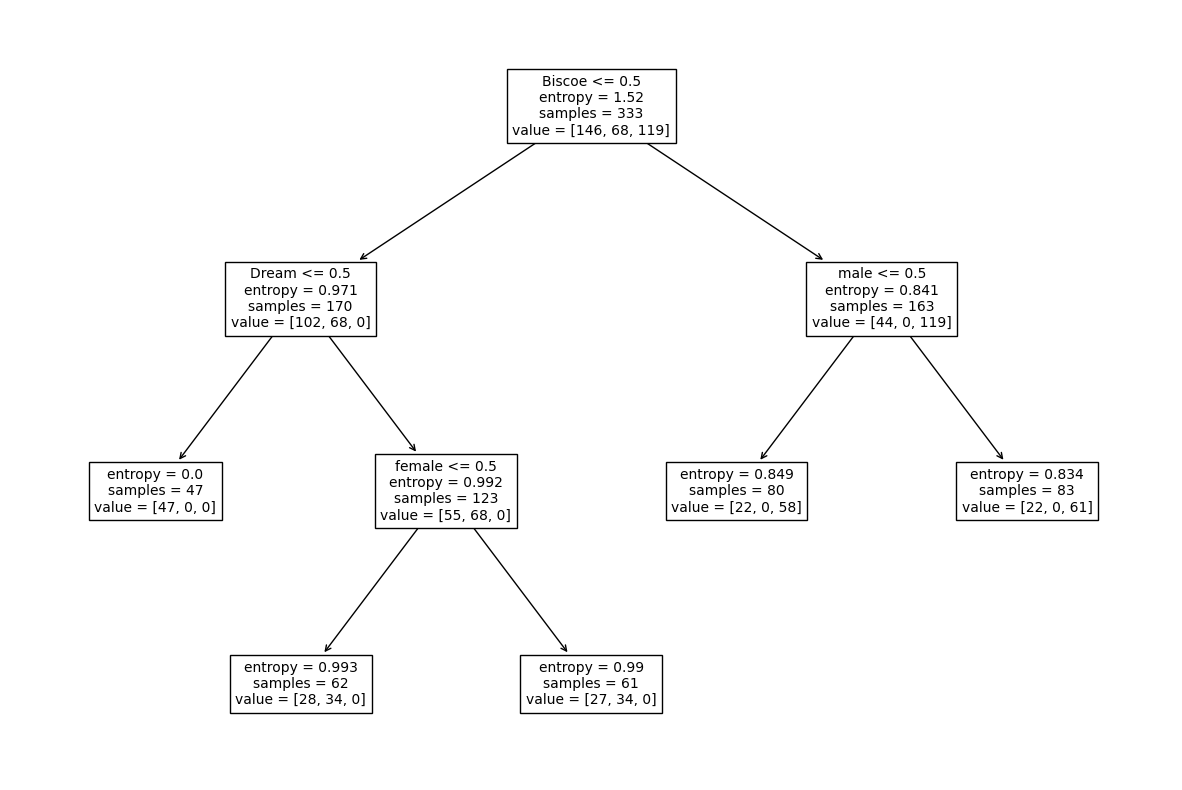

In [23]:
# solution here
from sklearn import tree
import matplotlib.pyplot as plt
X = discrete_penguin_dataset[['male', 'female', 'Biscoe', 'Torgersen','Dream']]
y = discrete_penguin_dataset['species']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
fig, ax = plt.subplots(figsize=(15, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=X.columns)
plt.show()

9. Create the function `predict_discrete` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: you can check the class of an object using the `isinstance` function.)

In [24]:
def predict_discrete(tree, test_instance):
    gender = test_instance[0]
    island = test_instance[1]
    genders = ['male','female']
    islands = ['Torgersen','Dream','Biscoe']
    
    #{'Adelie': 1,'Chinstrap':2,'Gentoo':3}
    key = list(tree.keys())[0]
    while len(list(tree[key]['values'].keys()))==2:
        if key in islands:
            if island != key:
                tree = tree[key]['values'][0]
            else:
                tree = tree[key]['values'][1]
        elif key in genders:
            if gender !=key:
                tree = tree[key]['values'][0]
            else:
                tree = tree[key]['values'][1]
        key = list(tree.keys())[0]
    
    nr = list(tree[key]['values'].items())[0][1]

    # if(nr==1):
    #     return 'Adelie'
    # elif nr == 2:
    #     return 'Chinstrap'
    # elif nr == 3:
    #     return 'Gentoo'
    # return '???'
    return nr

test_instance = ['female', 'Dream']
print(predict_discrete(id3_result,test_instance))

2


10. Predict the label for the first record from the dataset. (*Hint*: use the Pandas method `iloc`.)

In [25]:
# solution here
first_row = discrete_penguin_dataset.iloc[[0]]
genders = ['male','female']
islands = ['Torgersen','Dream','Biscoe']
gender = ''
island = ''
for g in genders:
    if(list(first_row[g])[0] == 1): #list(linie[atribut])[0] pt ca linie[atribut] returneaza si indexul liniei (pandas.series) si tb doar valoarea
        gender = g
for i in islands:
    if(list(first_row[i])[0] == 1):
        island = i

#{'Adelie': 1,'Chinstrap':2,'Gentoo':3}
print(predict_discrete(id3_result,[gender,island]))

1


11. Create the function `evaluate_discrete` that should return the accuracy of the model on a given set of records.

In [26]:
test_data = []
test_data_with_result = []
print(discrete_penguin_dataset.iloc[:5])
for i in range(5):
    row = discrete_penguin_dataset.iloc[[i]]
    species_nr = list(row['species'])[0]
    for g in genders:
        if(list(row[g])[0] == 1):
            gender = g
    for i in islands:
        if(list(row[i])[0] == 1):
            island = i
    test_data.append((gender,island))
    test_data_with_result.append({(gender,island) : species_nr})

#print(test_data)
#print(test_data_with_result)

def evaluate_discrete(tree, test_data):
    predict_results = []
    for test in test_data:
        result = predict_discrete(tree,test)
        predict_results.append({test:result})
    
    correct = 0
    for i in range(len(test_data)):
        test = test_data[i]
        expectation = test_data_with_result[i]
        result = predict_results[i]

        if expectation == result:
            correct +=1
    
    return correct/len(test_data)

print(evaluate_discrete(id3_result,test_data))


   Torgersen  Dream  Biscoe  male  female  species
0          1      0       0     1       0        1
1          1      0       0     0       1        1
2          1      0       0     0       1        1
3          1      0       0     0       1        1
4          1      0       0     1       0        1
1.0


12. Test the accuracy of the model on the whole penguin dataset.

In [27]:
test_data = []
test_data_with_result = []
#print(discrete_penguin_dataset.iloc[:5])
for i in range(len(discrete_penguin_dataset.filter(items=['species']))):
    row = discrete_penguin_dataset.iloc[[i]]
    species_nr = list(row['species'])[0]
    for g in genders:
        if(list(row[g])[0] == 1):
            gender = g
    for i in islands:
        if(list(row[i])[0] == 1):
            island = i
    test_data.append((gender,island))
    test_data_with_result.append({(gender,island) : species_nr})

#print(test_data)
#print(test_data_with_result)

def evaluate_discrete(tree, test_data):
    predict_results = []
    for test in test_data:
        result = predict_discrete(tree,test)
        predict_results.append({test:result})
    
    correct = 0
    for i in range(len(test_data)):
        test = test_data[i]
        expectation = test_data_with_result[i]
        result = predict_results[i]

        if expectation == result:
            correct +=1
    
    return correct/len(test_data)

print(evaluate_discrete(id3_result,test_data))

0.7027027027027027


13. Is the accuracy of the model 100%? If yes, why? If no, why?

*Answer here:*

In [28]:
#The accuracy of the model is 70% because there are instances of similar values with different outcomes 
#(e.g female and Biscoe can have both Gentoo and Adelie)

## IV. Decision Tree - the continuous case (3 points; bonus 0.1 points per week)

*Note*: For this case all features will be treated as being continuous. Use the entire `penguin_dataset`!

1. In order to include the continuous random variables in the decision trees, we need to discretise them. For that, we will use thresholds.

A threshold will appear between two consecutive values of the same feature that have different labels (label = the value of the target attribute).

Write a function `get_thresholds` that finds the thresholds for a continuous feature. The function takes three arguments: the dataset, the continuous feature and the target feature that contains the labels.

In [54]:
def get_thresholds(dataset, feature, target_feature):
    dataset = dataset.sort_values(by=[feature])
    #print(dataset.head())
    split_points = []
    first_row = dataset.iloc[[0]]
    current_tf_val = list(first_row[target_feature])[0] #aplic chestia din lab cu valori continue unde cand se schimba target feature fac media
    current_feature_val = list(first_row[feature])[0]
    #print(current_feature_val)
    for index, row in dataset.iterrows():
      tf_val = row[target_feature] #nu mai tb faza cu cast la lista pt ca nu mai folosesc iloc
      feature_val = row[feature]
      # print("ftrval ",feature_val)
      # print("cftval ",current_feature_val)
      if tf_val != current_tf_val:
        split_points.append((current_feature_val+feature_val)/2)
      current_tf_val = tf_val
      current_feature_val = feature_val
    return split_points

2. Find the thresholds for the attribute `flipper_length_mm`.

In [55]:
# solution here
print(get_thresholds(penguin_dataset, 'flipper_length_mm', 'species'))

[178.0, 178.0, 181.0, 181.0, 181.0, 181.0, 185.0, 185.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 188.0, 188.0, 188.5, 189.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 191.0, 191.0, 191.0, 191.5, 192.0, 192.0, 192.0, 192.0, 193.0, 193.0, 193.0, 193.0, 193.0, 194.0, 194.0, 194.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 197.0, 197.0, 197.0, 197.5, 198.0, 199.0, 199.0, 199.0, 199.0, 200.0, 200.0, 200.0, 201.0, 202.0, 203.0, 203.0, 203.0, 204.0, 205.0, 205.5, 206.5, 207.0, 207.5, 208.0, 208.0, 210.0, 210.0, 210.0, 210.0, 212.0, 212.0]


3. Find the best threshold for the attribute `flipper_length_mm` using the information gain.

In [87]:
# solution here
def best_threshold(dataset,feature,target_feature):
    thresholds = get_thresholds(dataset, feature, target_feature)
    thresholds = np.unique(thresholds)
    best = 0
    max_ig = 0
    max_ig_feature = ''
    best_threshold = 0
    for threshold in thresholds:
        #flipper_length < threshold
        dataset_st_threshold = dataset[dataset[feature] < threshold]
        features = list(dataset_st_threshold.columns)
        for f in features:
            if f != target_feature:
                ig = calculate_information_gain(dataset_st_threshold,f,target_feature)
                if ig>max_ig:
                    max_ig = ig
                    max_ig_feature = f
                    best_threshold=threshold
        
        #flipper_length > threshold
        dataset_gt_threshold = dataset[dataset[feature] >= threshold]
        features = list(dataset_gt_threshold.columns)
        for f in features:
            if f != target_feature:
                ig = calculate_information_gain(dataset_gt_threshold,f,target_feature)
                if ig>=max_ig:
                    max_ig = ig
                    max_ig_feature = f
                    best_threshold=threshold
    # print("best threshold:",best_threshold)
    # print("feature used:",max_ig_feature)
    # print("IG val:",max_ig)
    return (max_ig,max_ig_feature,best_threshold)

print(best_threshold(penguin_dataset,'flipper_length_mm','species'))





(1.161572125266003, 'bill_length_mm', 181.0)


4. Find the best feature and the best threshold to be used as root for the decision tree using the information gain.

In [88]:
# solution here
def findRootContinuous(dataset,target_feature):
    max_ig = 0
    max_ig_feature = ''
    best_threshold_ = 0
    features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
    for feature in features:
        if feature!='species':
            res = best_threshold(dataset,feature,target_feature)
            ig = res[0]
            bf = res[1]
            bt = res[2]
            if ig>max_ig:
                max_ig=ig
                max_ig_feature = feature
                best_threshold_ = bt
    return (max_ig_feature,best_threshold_,max_ig)

print(findRootContinuous(penguin_dataset,'species'))

('body_mass_g', 3550.0, 1.1999629414380628)


5. Let's suppose that the root node is "flipper_length_mm" and the threshold 206.5. Create the variable `filtered_dataset` that should store the sub-tree for `flipper_length_mm < 206.5`. Do not drop the column if there are any other thresholds for the same attribute.

In [33]:
# solution here

6. Create a function `id3_continuous` that runs the ID3 algorithm for the continuous case.

The output dictionary should have the same structure, with the following differences:
- the name of the root and of the internal nodes will not be just `feature name`, but `feature_name<threshold_value`.
- the keys of the "values" dictionary will be just "YES" (when the condition `feature<threshold` is met) and "NO" (otherwise)

You have an example in [output_example_continuous.txt](data/output_example_continuous.txt) file.


*Notes*: 
- Do NOT delete the chosen attribute if it has more than one threshold.

In [34]:
def id3_continuous(dataset):
    # we assume that the target attribute is the last column
    pass

7. Run the continuous version of ID3 algorithm on the `penguin_dataset` and store the tree in the variable `id3_continuous_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [35]:
# solution here

8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (25,10) should be enough.)

In [36]:
# solution here

9. Create the function `predict_continuous` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: the `split` method separates a string by a character)

In [37]:
def predict_continuous(tree, test_instance):
    pass

10. Predict the label for the first record from the dataset.

In [38]:
# solution here

11. Create the function `evaluate_continuous` that should return the accuracy of the model on a given set of records.

In [39]:
def evaluate_continuous(tree, test_data):
    pass

12. Test the accuracy of the model on the whole penguin dataset.

In [40]:
# solution here

13. Modify the `id3_continuous` function so it will allow pruning. (*Hint*: use a second parameter, `max_depth` to control the number of tree levels,)

In [41]:
def id3_continuous(dataset, max_depth = -1):
    # we assume that the target attribute is the last column
    pass

14. Apply the prunned version of ID3 (using the custom and the `sklearn` implementation) with `max_depth = 2`. Compare the results.

In [42]:
# solution here

# Points grading

| Section | Exercise | Points |
| --- | --- | --- |
| I | 1 | 0.2 |
| I | 2 | 0.2 |
| I | 3 | 0.2 |
| I | 4 | 0.2 |
| I | 5 | 0.2 |
| II | 1 | 0.4 |
| II | 2 | 0.1 |
| II | 3 | 0.4 |
| II | 4 | 0.1 |
| II | 5 | 0.7 |
| II | 6 | 0.5 |
| II | 7 | 0.1 |
| II | 8 | 0.2 |
| III | 1 | 0.1 |
| III | 2 | 0.2 |
| III | 3 | 0.1 |
| III | 4 | 0.3 |
| III | 5 | 0.1 |
| III | 6 | 1.3 |
| III | 7 | 0.1 |
| III | 8 | 0.5 |
| III | 9 | 0.3 |
| III | 10 | 0.1 |
| III | 11 | 0.1 |
| III | 12 | 0.1 |
| III | 13 | 0.2 |
| IV | 1 | 0.5 |
| IV | 2 | 0.1 |
| IV | 3 | 0.15 |
| IV | 4 | 0. 2 |
| IV | 5 | 0. 05 |
| IV| 6 | 0.5 |
| IV | 7 | 0.1 |
| IV | 8 | 0.3 |
| IV | 9 | 0.3 |
| IV | 10 | 0.1 |
| IV | 11 | 0.1 |
| IV | 12 | 0.1 |
| IV | 13 | 0.3 |
| IV | 14 | 0.2 |
